#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Load the Data

In [2]:
df=pd.read_csv('../input/pubg-data/data.csv')
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


#### First four columns are seems not important,Drop the columns

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [5]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [6]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,5.448503e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,7.129032e-01,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


#### Data-types of columns

In [7]:
df.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

#### Look for any Null/Missing values

In [8]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

#### There is a Null value in the winPlacePerc. We can fill this using mean of the winPlacePerc column

In [9]:
df['winPlacePerc']=df['winPlacePerc'].fillna(np.mean(df['winPlacePerc']))

#### Checking Again for Safety purposes

In [10]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [11]:
for i in df.columns:
    print('--'*20,i,'--'*20)
    print(df[i].value_counts())

---------------------------------------- Id ----------------------------------------
d57b2909ccd27a    1
c155d0dad6f8f8    1
1dc207c9a9478a    1
beb9b1bddd0f4c    1
c42788a9d25ac8    1
                 ..
5e69616beaff89    1
a4d91ee92f4d34    1
a333da4a442e6a    1
dd7ebf6b0003de    1
de92d2f877119e    1
Name: Id, Length: 1111742, dtype: int64
---------------------------------------- groupId ----------------------------------------
14d6b54cdec6bc    17
7385e5fe214021    16
128b07271aa012    16
6a292d4d1a0207    12
16e3effdf983d7    11
                  ..
29cfe30ecb691f     1
87d71b031dcb55     1
4a8d56655c8976     1
11c331442cc5df     1
33a9314c159980     1
Name: groupId, Length: 870622, dtype: int64
---------------------------------------- matchId ----------------------------------------
7db80b78103e95    42
f7182fcc0d8cc8    42
9bc88ae66d6f63    41
0df04a873a35cf    40
7acc0bdc670548    40
                  ..
6fd4b1adb6da3c     1
662c9c7f9e87d0     1
8c889c32f1490e     1
3eee069f0eb

In [12]:
import warnings
warnings.filterwarnings('ignore')

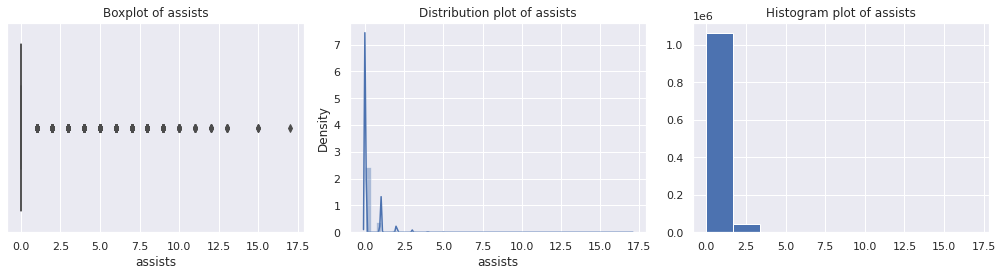

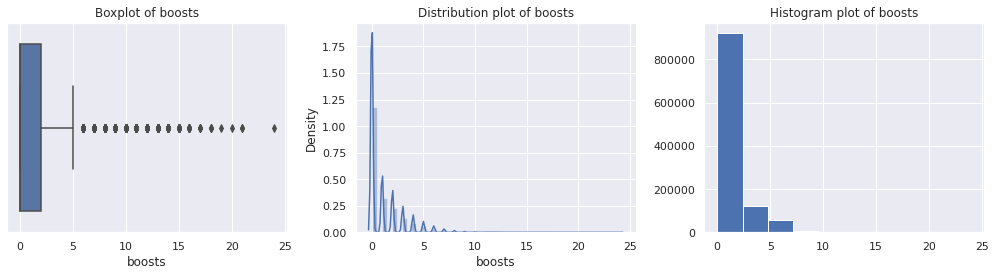

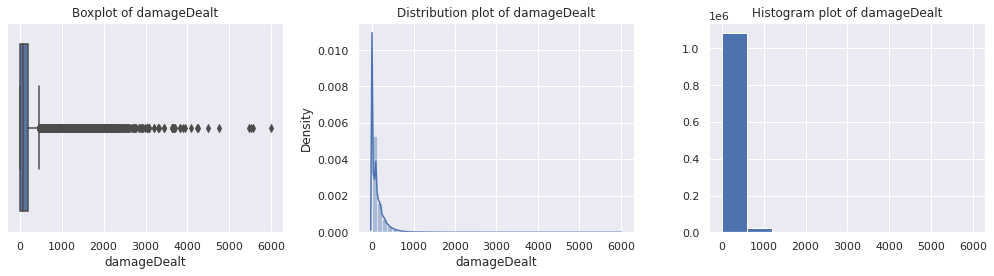

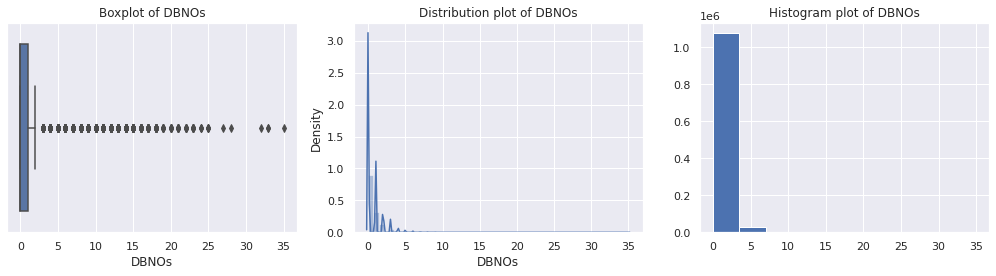

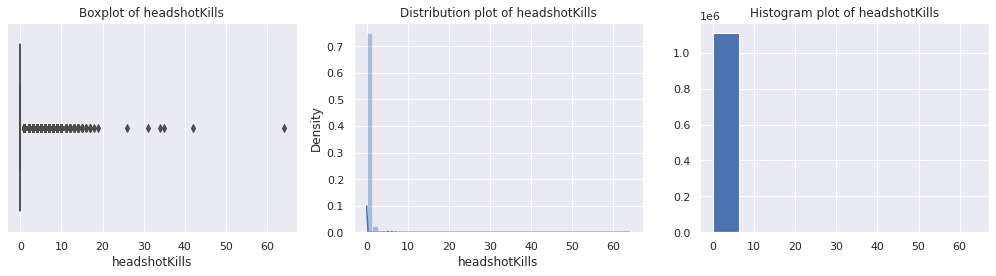

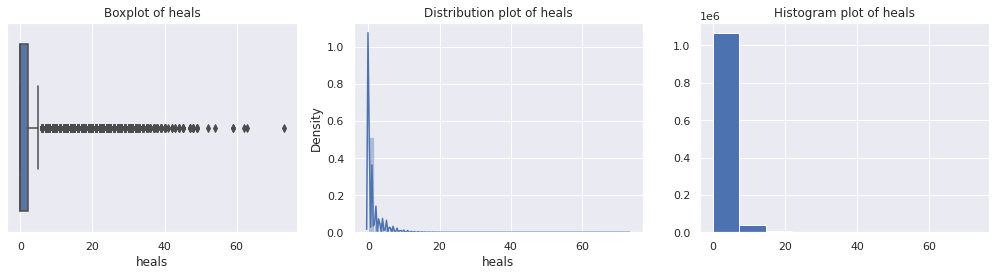

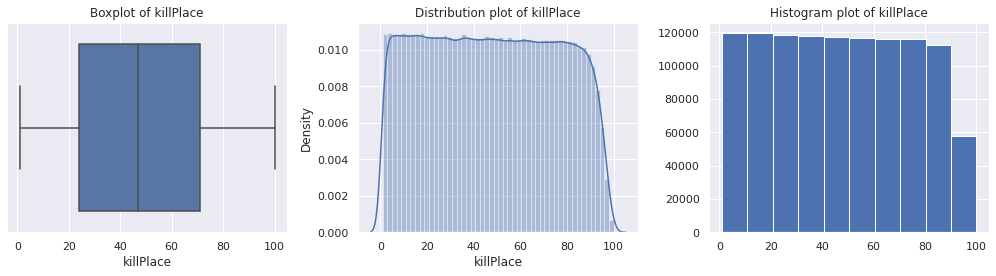

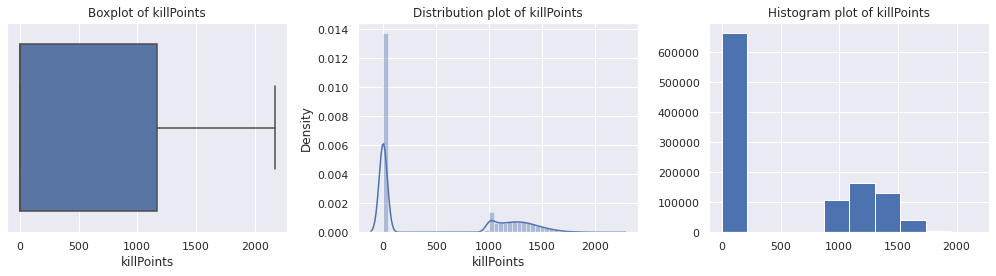

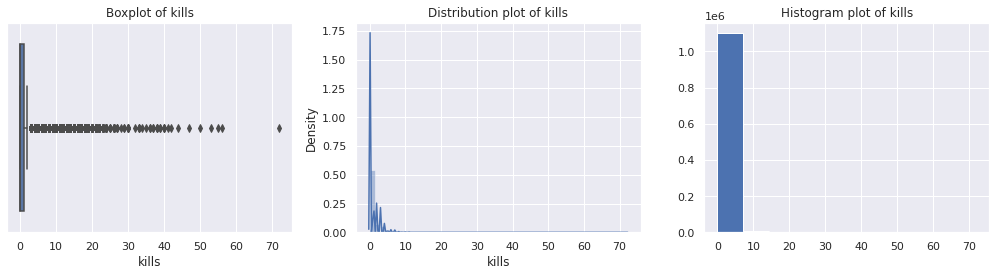

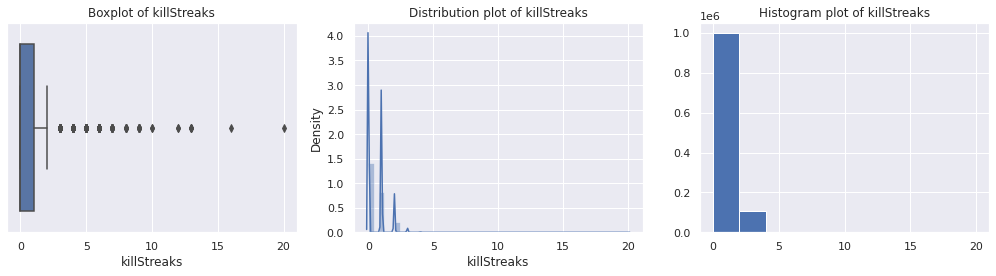

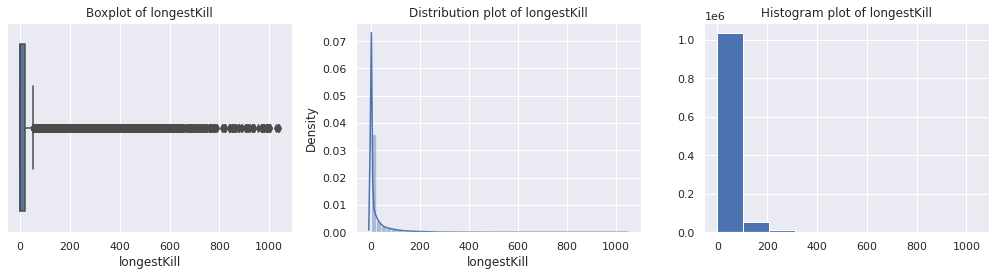

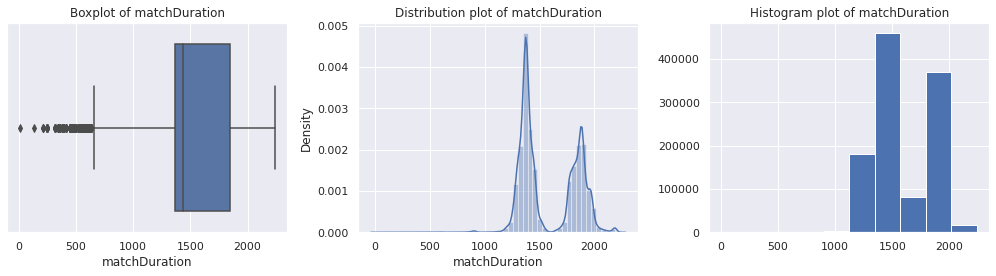

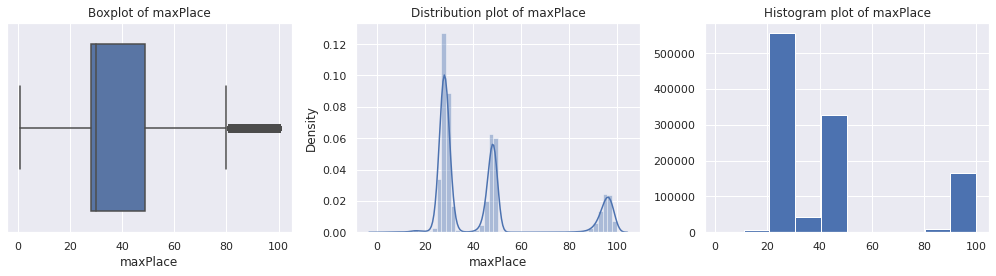

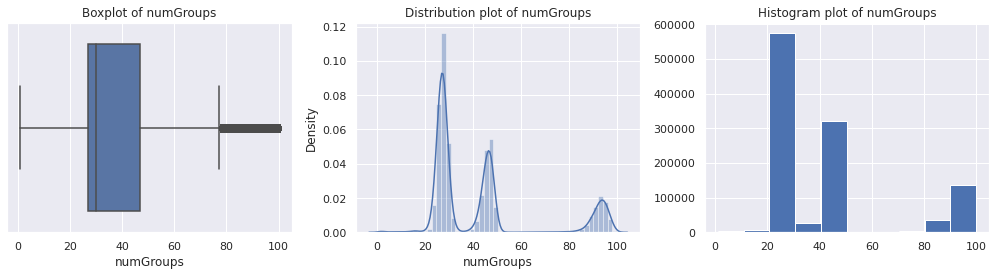

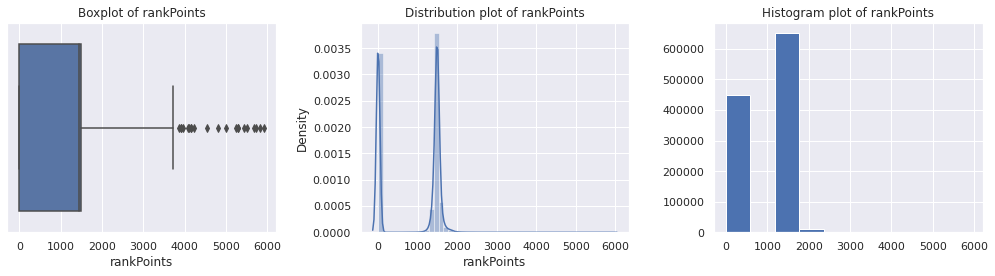

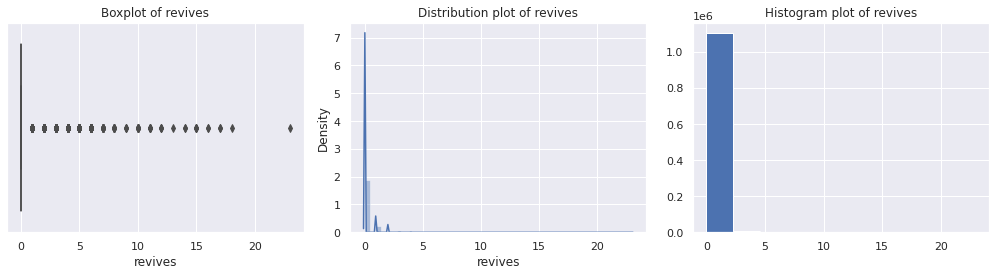

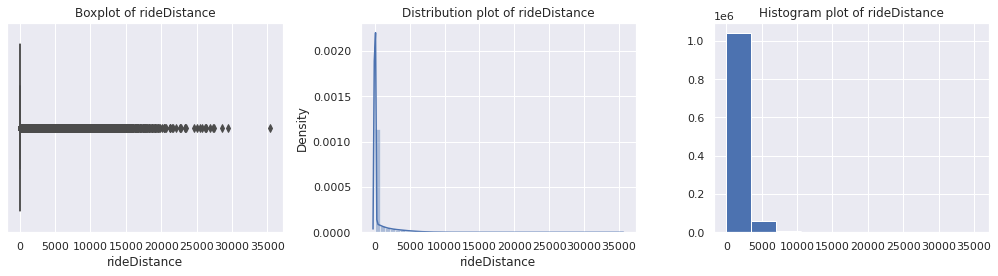

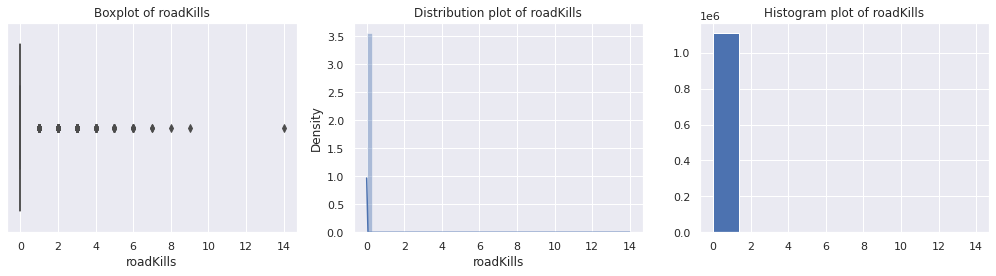

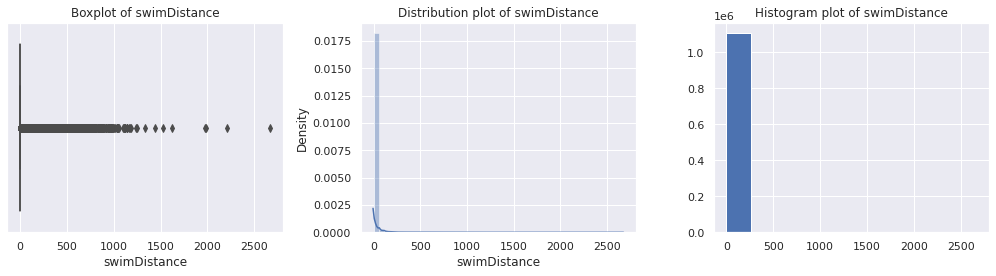

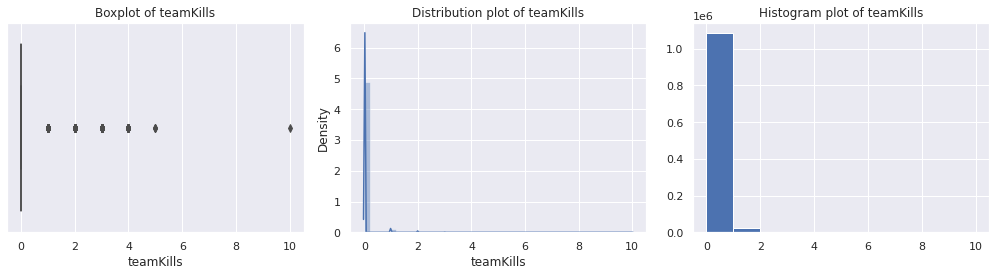

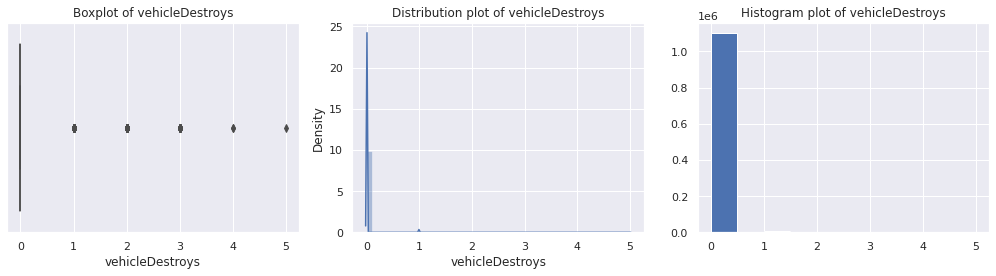

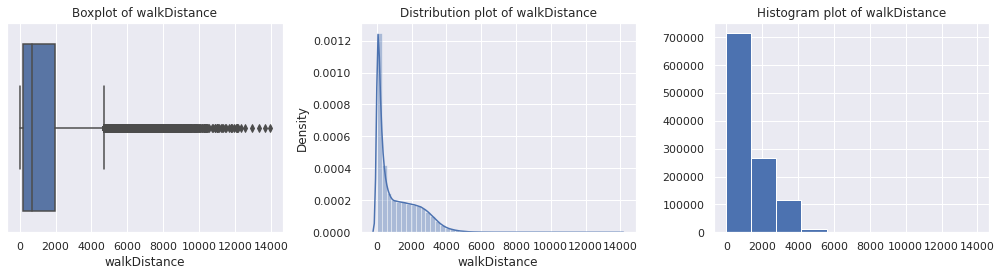

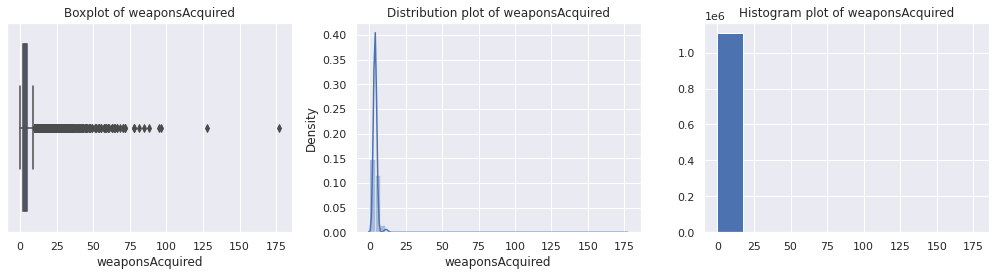

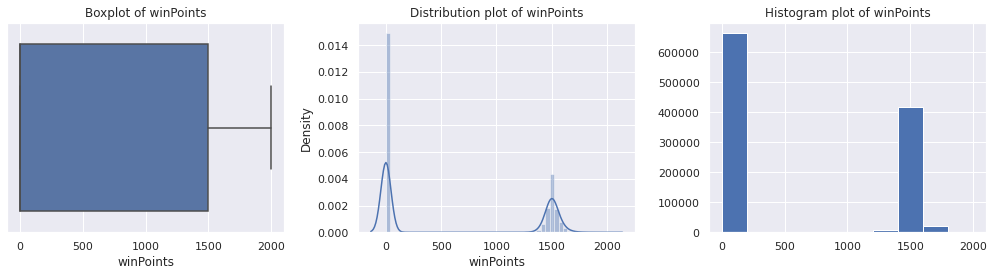

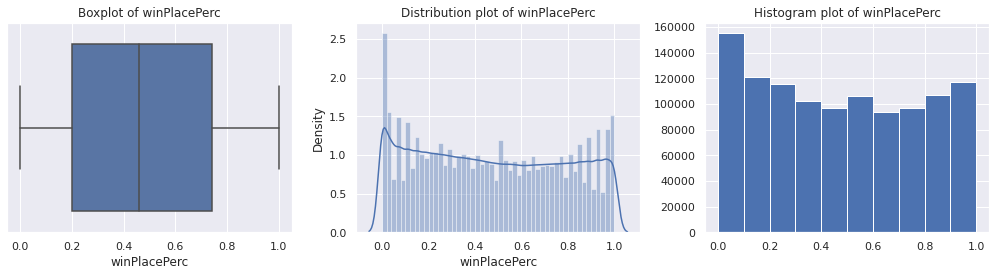

In [13]:
def box_dist_plot(col):
    fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(14, 4))
    sns.boxplot(x=df[col], ax=ax1)
    ax1.set_title('Boxplot of {}'.format(df[col].name))
    sns.distplot(df[col], ax=ax2)
    ax2.set_title('Distribution plot of {}'.format(df[col].name))
    df[col].hist(ax=ax3)
    ax3.set_title('Histogram plot of {}'.format(df[col].name))
    
    fig.tight_layout()
    

    
    
for i in df.columns:
        if((df[i].dtype == np.float64) or (df[i].dtype == np.int64)):
            box_dist_plot(i)

    

From the boxplots we can see that there are some outliers in each of the numerical columns/

In [14]:
def find_outliers(col):
    outliers = []
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    
    IQR = (Q3 - Q1)

    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    
    print('Q1:',Q1,', Q3:',Q3,', IQR:',IQR,', Lower_limit:',lower_limit,', Upper_limit:', upper_limit)
    
    for i in df[col]:
        if (i > upper_limit) or (i < lower_limit):
            outliers.append(i)
            
    return outliers

#### Columns-wise outlier counts

In [20]:
for i in df.columns:
    if((df[i].dtype == np.float64) or (df[i].dtype == np.int64)):
        print(i,' : ',len(find_outliers(i)),'\n','---'*30)

Q1: 0.0 , Q3: 0.0 , IQR: 0.0 , Lower_limit: 0.0 , Upper_limit: 0.0
assists  :  194611 
 ------------------------------------------------------------------------------------------
Q1: 0.0 , Q3: 2.0 , IQR: 2.0 , Lower_limit: -3.0 , Upper_limit: 5.0
boosts  :  35533 
 ------------------------------------------------------------------------------------------
Q1: 0.0 , Q3: 185.9 , IQR: 185.9 , Lower_limit: -278.85 , Upper_limit: 464.75
damageDealt  :  54026 
 ------------------------------------------------------------------------------------------
Q1: 0.0 , Q3: 1.0 , IQR: 1.0 , Lower_limit: -1.5 , Upper_limit: 2.5
DBNOs  :  73607 
 ------------------------------------------------------------------------------------------
Q1: 0.0 , Q3: 0.0 , IQR: 0.0 , Lower_limit: 0.0 , Upper_limit: 0.0
headshotKills  :  187930 
 ------------------------------------------------------------------------------------------
Q1: 0.0 , Q3: 2.0 , IQR: 2.0 , Lower_limit: -3.0 , Upper_limit: 5.0
heals  :  81625 
 --

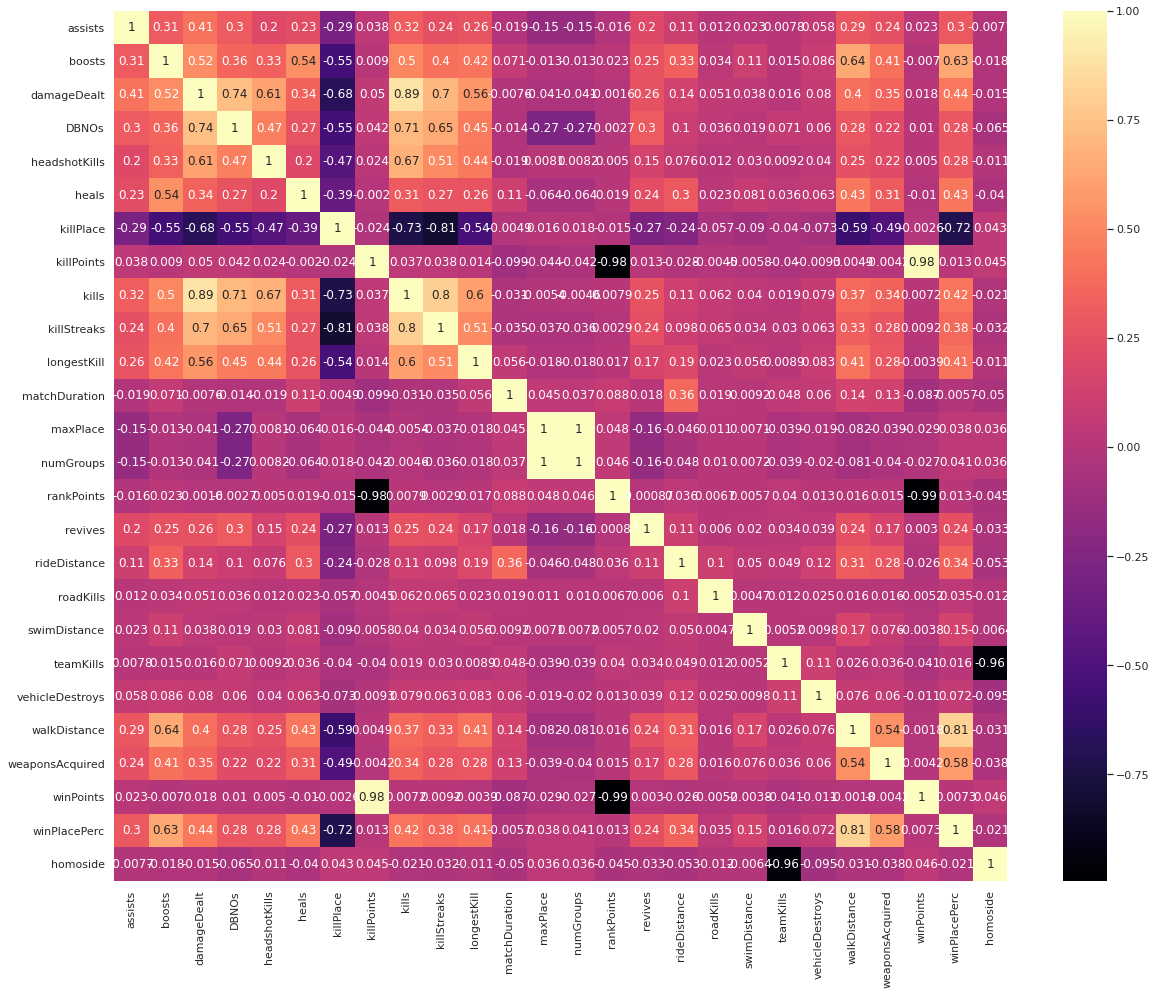

In [21]:
plt.figure(figsize=(20,16))
corm=df.corr()
top_cor_feature=corm.index

g=sns.heatmap(df[top_cor_feature].corr(),cmap='magma',annot=True)

##### From the above heatmap we can see that following has the higher co-realtion :
     column1        column2   co-realtion
     damage-dealts   kills       0.89
     winpoint        kill point  0.98
     numgroup        maxplace     1

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1111742 non-null  object 
 1   groupId          1111742 non-null  object 
 2   matchId          1111742 non-null  object 
 3   assists          1111742 non-null  int64  
 4   boosts           1111742 non-null  int64  
 5   damageDealt      1111742 non-null  float64
 6   DBNOs            1111742 non-null  int64  
 7   headshotKills    1111742 non-null  int64  
 8   heals            1111742 non-null  int64  
 9   killPlace        1111742 non-null  int64  
 10  killPoints       1111742 non-null  int64  
 11  kills            1111742 non-null  int64  
 12  killStreaks      1111742 non-null  int64  
 13  longestKill      1111742 non-null  float64
 14  matchDuration    1111742 non-null  int64  
 15  matchType        1111742 non-null  object 
 16  maxPlace         1

#### Now we'll check for match-wise players counts

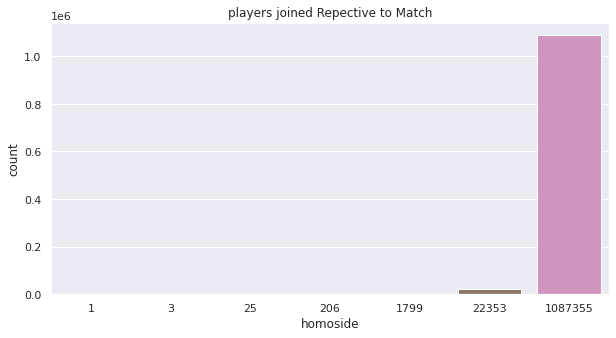

In [23]:
plt.figure(figsize=(10,5))

df['homoside']=df.groupby('teamKills')['teamKills'].transform('count')
sns.countplot(df['homoside'])
plt.title('players joined Repective to Match')
plt.show()

#### from the abpve plot we can see that the most no players played in a match is 42. Most of the matches are played with 25 players

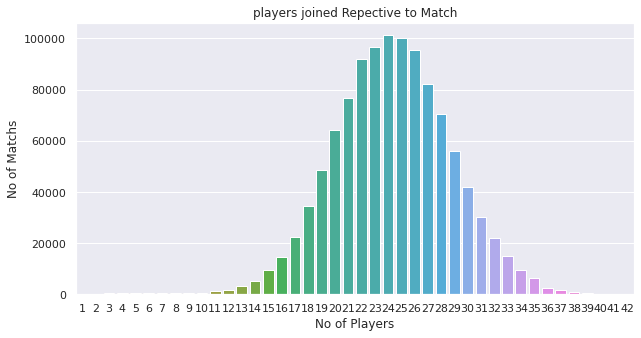

In [25]:
plt.figure(figsize=(10,5))

df['pl']=df.groupby('matchId')['matchId'].transform('count')
sns.countplot(df['pl'])
plt.title('players joined Repective to Match')
plt.xlabel('No of Players')
plt.ylabel('No of Matchs')
plt.show()

In [27]:
df['pl'].max()

42

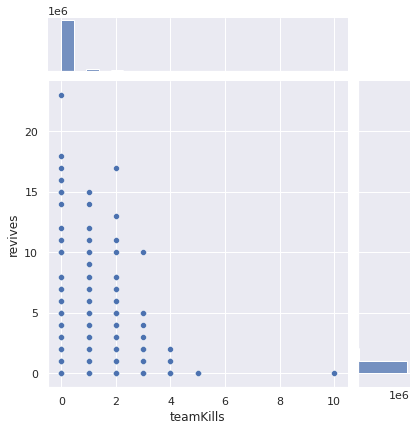

In [28]:
sns.jointplot(df['teamKills'], df['revives'])

#### From the above grpah we can see that if the person will harm its own teammembers then there wll  be a higher chances that no one will revive them.

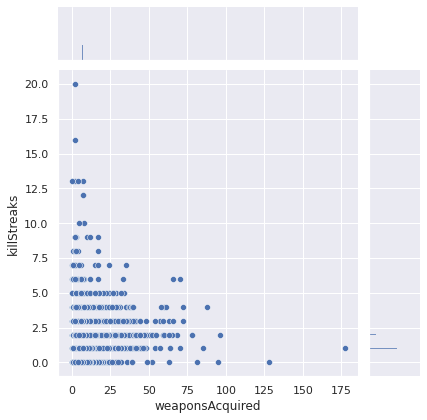

In [29]:
sns.jointplot(df['weaponsAcquired'], df['killStreaks'])

### In this plot we can see that the people with the less weapons acuquired kills more enemies.But people with more weapons has a lower kill rate.That means here weapon is a factor but strategy matters.

#### In pubg game we have already heard about some cheating techniques, where players kills enemies wwithout moving 0 distance.or having a headshot without acquiring a weapon

In [30]:
df['movingDistance'] = df['walkDistance'] + df['swimDistance'] + df['rideDistance']
df[['movingDistance','kills']]

,movingDistance,kills
0,151.300,0
1,1918.000,0
2,4908.000,0
3,38.810,0
4,2639.400,1
...,...,...
1111737,799.800,0
1111738,4326.000,2
1111739,60.450,1
1111740,5819.000,0


In [33]:
df['killsWotMoving'] = ((df['kills'] > 0) & (df['movingDistance'] == 0))
df['killsWotMoving']

0          False
1          False
2          False
3          False
4          False
           ...  
1111737    False
1111738    False
1111739    False
1111740    False
1111741    False
Name: killsWotMoving, Length: 1111742, dtype: bool

In [34]:
display(df[df['killsWotMoving'] == True].shape)
df[['Id','weaponsAcquired','killsWotMoving', 'kills', 'movingDistance','headshotKills']][df['killsWotMoving'] == True].head(10)

(375, 34)

,Id,weaponsAcquired,killsWotMoving,kills,movingDistance,headshotKills
1267,c80731765f5704,19,True,9,0.0,1
2977,32cc8af554977f,1,True,1,0.0,0
5585,1ed752158c7bbc,27,True,4,0.0,1
9700,d4b5b144dbb5df,22,True,3,0.0,0
10092,861fd334addd94,14,True,5,0.0,0
14025,a4d301a7407a07,13,True,4,0.0,2
14964,e88981e06fc0e7,29,True,23,0.0,0
16337,778e65309ef561,13,True,4,0.0,1
17352,11463dca072357,12,True,5,0.0,3
19418,96805fcf390f3e,16,True,12,0.0,6


#### These are the Players who have killed peoples without moving any distance and also they acquired weapon without moving, killed some enemies with headshot also. So we can conclude that, they were using some cheating techniques.
# pata nahi ji konsa nasha karta hai !!!!

#### Now we'll analyse the longest-distance kills

Text(0.5, 0, 'Distance in Meters')

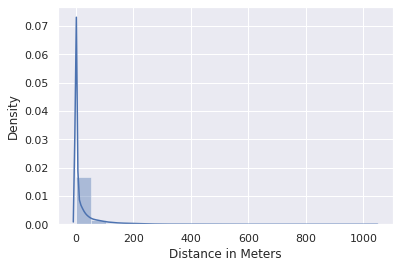

In [35]:
sns.distplot(df['longestKill'],bins=20)
plt.xlabel("Distance in Meters")

##### Most lethal weapon of sniper in pubg can shoot upto 1000meter,but it's also depends on the players.If They are shooting anybody gretaer than 1000m then he might be a good shooter or a cheater.

In [37]:
# sns.countplot(x=df['kills'],y=df['winPlacePerc'],hue=df['matchType'])

In [ ]:
from scipy import stats
print(stats.zscore(df.))